## Parameters

In [16]:
population_size = 1000
generations_size = 100
initial_generation_limit = 15

#Figures
color_transparency = 200
## Circle
min_radius = 2
max_radius = 10
## Polygons
min_edge_length = 15
max_edge_length = 50

# Mutation
mutation_chance = 0.4
min_mutation_amount = 1
max_mutation_amount = 10

#Crossover
max_crossover_amount = 100

#Selection
selection_percent = 0.1


## Working with images

## Figure classes

In [6]:
class Circle:
    def __init__(self, center, radius, color):
        x, y = center
        self.points = [x - radius, y - radius, 
                      x + radius, y + radius]
        self.color = color
    
    def draw(self, picture):
        draw = ImageDraw.Draw(picture, 'RGBA')
        draw.ellipse(self.points, fill=self.color)
    
    @staticmethod 
    def get_random():
        radius = np.random.uniform(low=min_radius, high=max_radius)

        x = np.random.randint(0, pic.size[0])
        y = np.random.randint(0, pic.size[1])
        color = (np.random.randint(256), np.random.randint(256), np.random.randint(256), color_transparency)
        
        return Circle((x, y), radius, color)
    
class Polygon:
    def __init__(self, points, color):
        self.points = points
        self.color = color
    
    def draw(self, picture):
        draw = ImageDraw.Draw(picture, 'RGBA')
        draw.polygon(self.points, fill=self.color)
                     
    @staticmethod
    def get_random(n_vertices=3):
        points = []
        curr_point = (np.random.randint(0, pic.size[0]), np.random.randint(0, pic.size[0]))
        points.append(curr_point)
        for _ in range(n_vertices - 1):
            new_point = (np.random.randint(curr_point[0], curr_point[0] + max_edge_length), 
                         np.random.randint(curr_point[1], curr_point[1] + max_edge_length))
            curr_point = new_point
            points.append(curr_point)
        
        color = (np.random.randint(256), np.random.randint(256), 
                 np.random.randint(256), color_transparency)
        return Polygon(points, color)
        

## Chromosome class 

In [9]:
class Chromosome:
    def __init__(self, gene):
        self.gene = np.array(gene)
        self.picture = Image.fromarray(self.gene.astype('uint8'))
        self.update_score()

    def mutate(self):
        choice = np.random.rand()
        if choice >= mutation_chance:
            return

        min_mutation = min_mutation_amount*self.score
        max_mutation = max_mutation_amount*self.score
        mutation_amount = np.random.uniform(min_mutation, max_mutation)
        to_draw = []

        while mutation_amount >= min_radius:
            radius = np.random.uniform(low=min_radius, high=max_radius)
            mutation_amount -= radius

            x = np.random.randint(0, pic.size[0])
            y = np.random.randint(0, pic.size[1])
            # color = (np.random.randint(256), np.random.randint(256), np.random.randint(256), color_transparency)
            color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))

            to_draw.append([(x, y), radius, color])

        draw_circles(self.picture, to_draw)
        self.update_score()

    def update_score(self, original=pic):
        self.score = fitness_score(self.picture, original)

    @staticmethod
    def get_random():
        random_data = Chromosome.random_gene()
        return Chromosome(random_data)

    @staticmethod
    def random_gene():
        #         return np.random.randint(0, 256, pic_arr.shape)
        return np.ones_like(pic_arr)*255

    def copy(self):
        return Chromosome(self.gene)

    def __eq__(self, other):
        return self.score == other.score

    def __lt__(self, other):
        return self.score < other.score

    def __repr__(self):
        self.picture.show()
        return str(self.score)


## Utilities for the genetic algorithm

In [11]:
def fitness_score(current, original=pic):
#     curr_grey = current.convert("L")
#     orig_grey = original.convert("L")
#     res = np.subtract(curr_grey, orig_grey)
    res = np.subtract(current, original)
    res = np.square(res)
    return np.sum(res)/(current.size[0]*current.size[1])


def cross_2(data1:Chromosome, data2:Chromosome):
    result = np.s
    return Chromosome((data1z.gene + data2.gene)/2)
        
    
def crossover(generation, n:int):
    indexes = list(range(0, len(generation)))
    if len(generation) > n:
        to_cross = np.random.choice(indexes, n, replace=False)
    else:
        to_cross = indexes
    
    res = []
    for i in range(1, len(to_cross)):
        child = cross_2(generation[i - 1], generation[i])
        res.append(child)
    
    return res
    

def mutation(generation):
    for sample in generation:
        sample.mutate()

def selection(generation):
    n_remove = int(selection_percent*len(generation))
    return generation[: len(generation) - n_remove]



In [105]:
# generation = [Chromosome.get_random() for _ in range(initial_generation_limit)]
# 
# for i in range(generations_size):
#     cross_amount = np.random.randint(1, max_crossover_amount + 1)
# #     print(cross_amount, 'crossovers')
#     children = crossover(generation, cross_amount)
#     generation += children 
#     
#     mutation(generation)
#     
# #     print('Before:', len(generation))
#     generation.sort()
#     generation = selection(generation)
#     while len(generation) > population_size:
#         generation.pop()
# #     print('After:', len(generation))
# #     print('Score:', generation[0].score)
# #     print()
#     if i > generations_size - 10:
#         print(generation[0])
#     
# print(generation[0])
# for i in range(len(generation)):
#     generation[i].picture.save('last_cycle/img{}.png'.format(str(i)))
#     
# generation[0].picture.save('result.png')

118.51668930053711
118.51668930053711
118.51668930053711
118.51668930053711
118.51668930053711
118.51668930053711
118.51668930053711
118.51668930053711
118.51668930053711
118.51668930053711


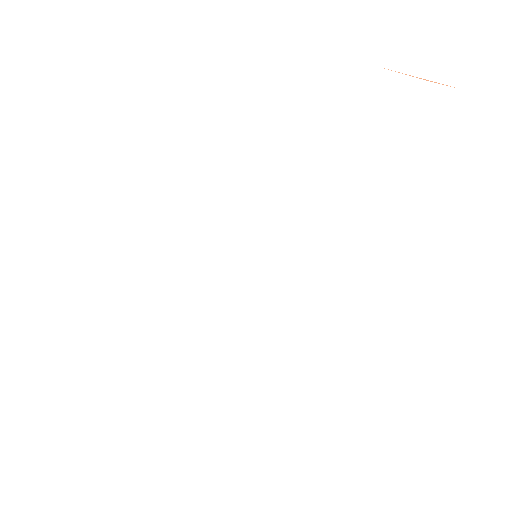

In [18]:
# generation = [Chromosome.get_random() for _ in range(initial_generation_limit)]
# generation[0].score
generation = [Chromosome.get_random() for _ in range(initial_generation_limit)]
test = generation[0].picture
draw = ImageDraw.Draw(pic, 'RGBA')
polygon = Polygon.get_random(3)
polygon.draw(test)
test